In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from graphviz import Source
from sklearn.tree import export_graphviz
from IPython.display import SVG
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter('ignore')

In [2]:
cars = pd.read_csv('car_evaluation.csv')
cars

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


#Data Preprocessing

In [3]:
col = ['buying_price','maintenance_cost','no_of_doors','no_of_persons','lug_boot','safety','decision']
cars.columns = col

In [4]:
cars

,buying_price,maintenance_cost,no_of_doors,no_of_persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [5]:
cars['no_of_persons'].unique()

array(['2', '4', 'more'], dtype=object)

In [6]:
cars['decision'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: decision, dtype: int64

In [7]:
cars['decision'] = cars['decision'].replace(['good', 'vgood'], 'acc')

In [8]:
cars['decision'] = cars['decision'].replace({"unacc": 0, "acc": 1})

In [9]:
X = cars[['buying_price','maintenance_cost','no_of_doors','no_of_persons','lug_boot','safety']]
y = cars['decision']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

encoder = OrdinalEncoder()
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [11]:
X_train.shape, X_test.shape

((1208, 6), (519, 6))

In [12]:
y_train

1177    1
585     0
1551    1
727     1
707     0
       ..
1130    0
1294    1
860     0
1459    0
1126    1
Name: decision, Length: 1208, dtype: int64

#Decision Tree Classifier

By considering all features

In [ ]:
cols = ['buying_price','maintenance_cost','no_of_doors','no_of_persons','lug_boot','safety']

# cols = ['buying_price','no_of_doors','no_of_persons']

Using gridSearch

In [ ]:
param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 6, 9, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 3, 4, 5]
}

In [ ]:
clf = DecisionTreeClassifier()

grid = GridSearchCV(clf, param, cv=5)
grid.fit(X_train, y_train)

print('best parameters:', grid.best_params_)
print('accuracy score:', grid.best_score_)

best parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 2}
accuracy score: 0.9842735159973938


In [ ]:
y_pred_train = grid.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print('Training Accuracy:', accuracy_train)

y_pred_test = grid.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print('Testing Accuracy:', accuracy_test)

Training Accuracy: 0.9900662251655629
Testing Accuracy: 0.9826589595375722


In [ ]:
p,r,f,s = precision_recall_fscore_support(y_test, y_pred_test)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'precision = [0.98087432 0.9869281 ]'

'recall = [0.99445983 0.9556962 ]'

'f-score = [0.98762036 0.97106109]'

<Axes: >

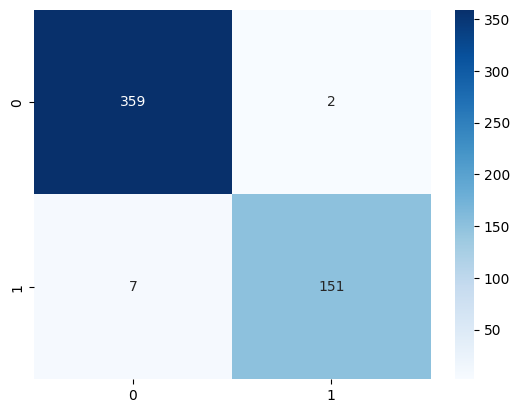

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

Trying with different depths

For depth 3:

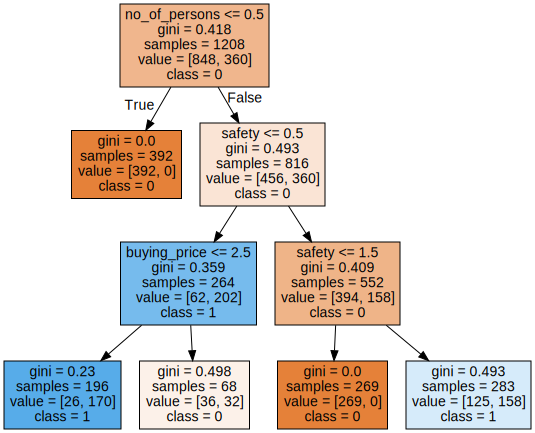

In [ ]:
treeclf1 = DecisionTreeClassifier(max_depth=3, random_state=42)
treeclf1.fit(X_train, y_train)
graph = Source(tree.export_graphviz(treeclf1, out_file=None,
                                    feature_names=cols,
                                    class_names=['0', '1'], filled = True))
svg = SVG(graph.pipe(format='svg'))
display(svg)


In [ ]:
y_pred_train = treeclf1.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)

y_pred_test = treeclf1.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

print('Training Accuracy:', train_accuracy)
print('Testing Accuracy:', test_accuracy)

Training Accuracy: 0.8485099337748344
Testing Accuracy: 0.8786127167630058


In [ ]:
p,r,f,s = precision_recall_fscore_support(y_test, y_pred_test)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'precision = [0.95705521 0.74611399]'

'recall = [0.86426593 0.91139241]'

'f-score = [0.90829694 0.82051282]'

<Axes: >

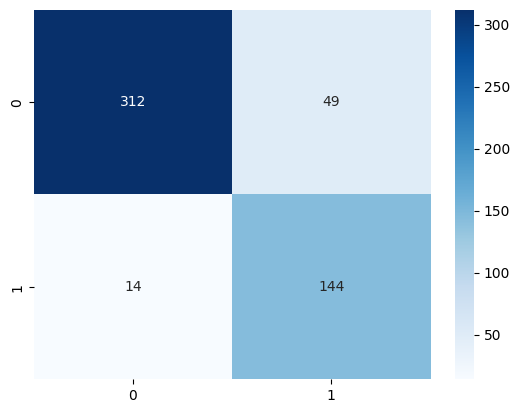

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [ ]:
pd.DataFrame({'feature':cols, 'importance':treeclf1.feature_importances_})

,feature,importance
0,buying_price,0.055406
1,maintenance_cost,0.000000
2,no_of_doors,0.000000
3,no_of_persons,0.359318
4,lug_boot,0.000000
5,safety,0.585276


For depth: 9

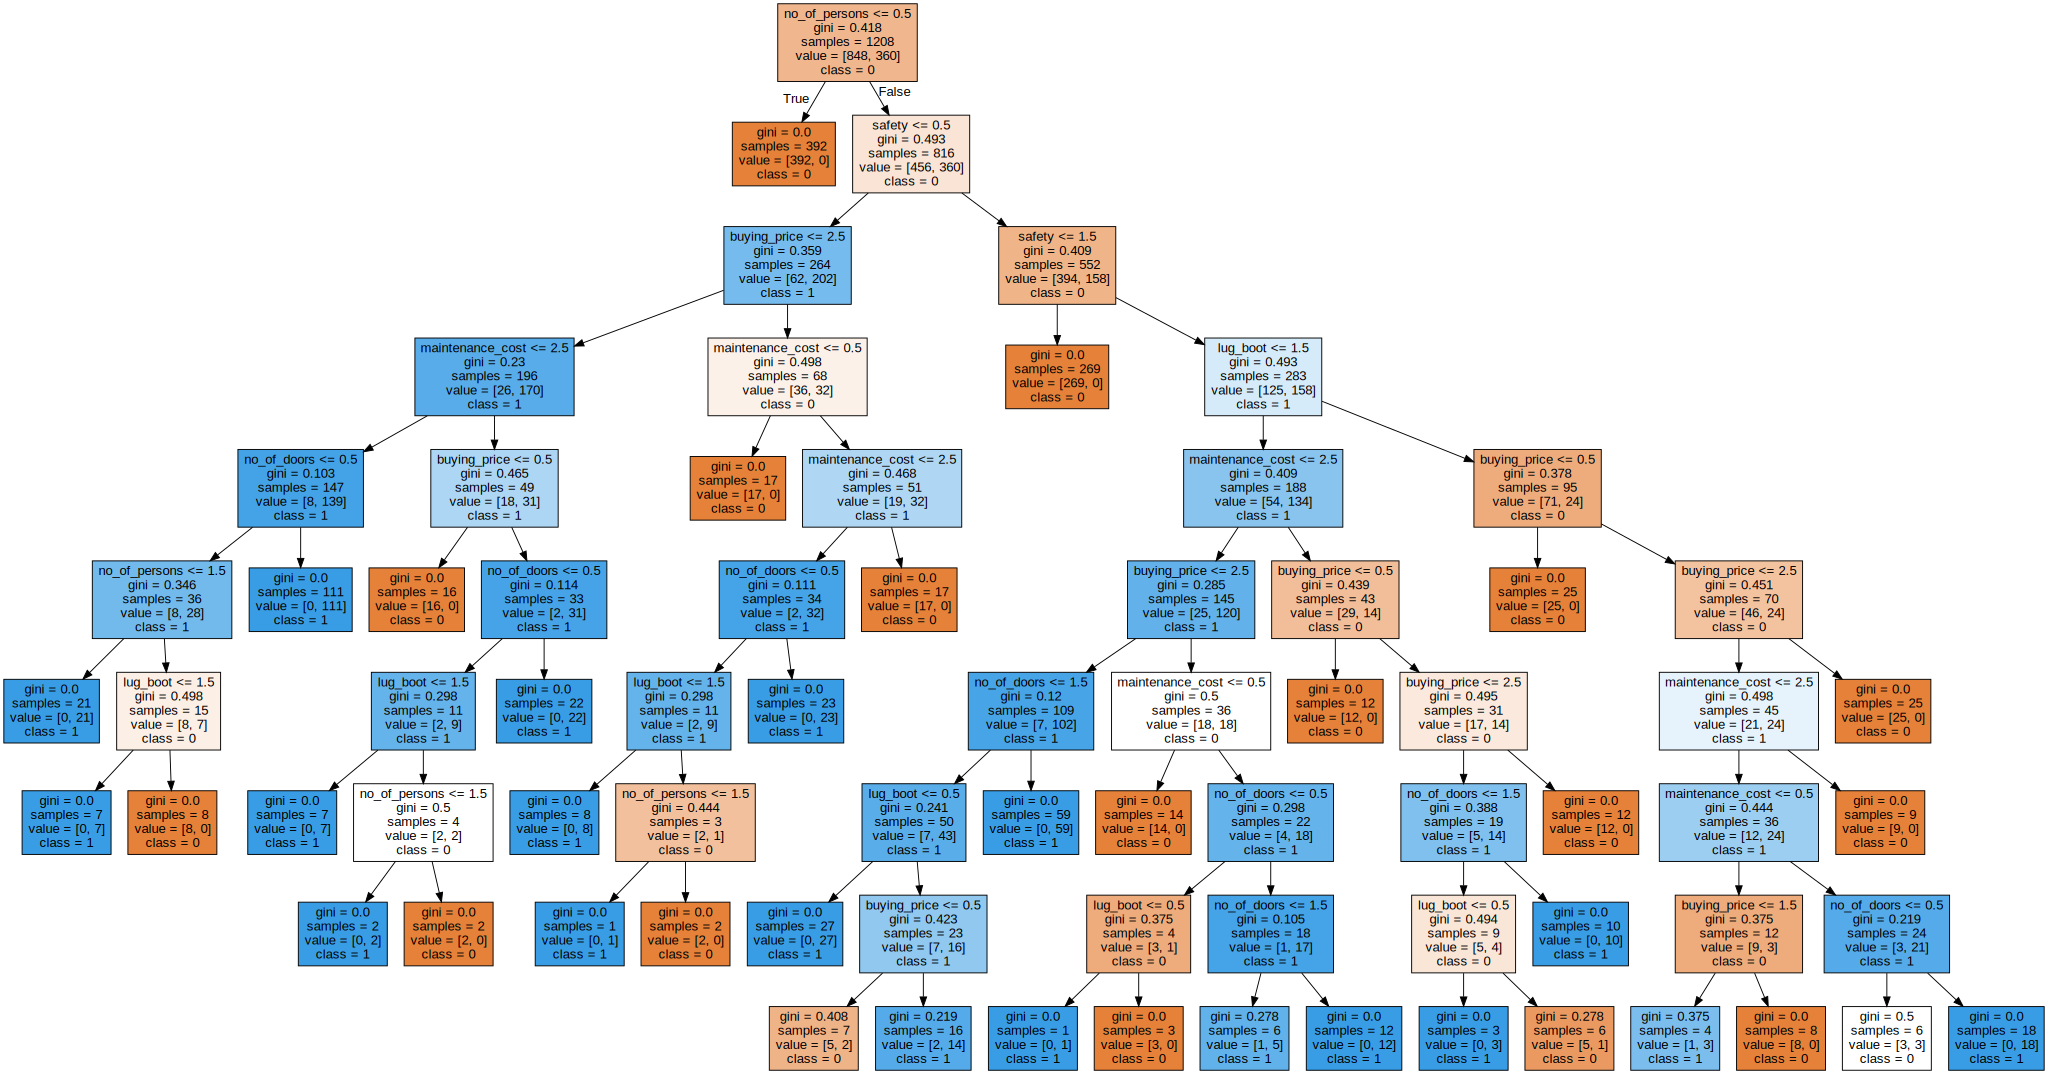

In [ ]:
treeclf = DecisionTreeClassifier(max_depth=9, random_state=42)
treeclf.fit(X_train, y_train)
graph = Source(tree.export_graphviz(treeclf, out_file=None,
                                    feature_names=cols,
                                    class_names=['0', '1'], filled = True))
svg = SVG(graph.pipe(format='svg'))
display(svg)


In [ ]:
y_pred_train = treeclf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)

y_pred_test = treeclf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

print('Training Accuracy:', train_accuracy)
print('Testing Accuracy:', test_accuracy)

Training Accuracy: 0.9917218543046358
Testing Accuracy: 0.9903660886319846


In [ ]:
p,r,f,s = precision_recall_fscore_support(y_test, y_pred_test)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'precision = [0.99171271 0.98726115]'

'recall = [0.99445983 0.98101266]'

'f-score = [0.99308437 0.98412698]'

<Axes: >

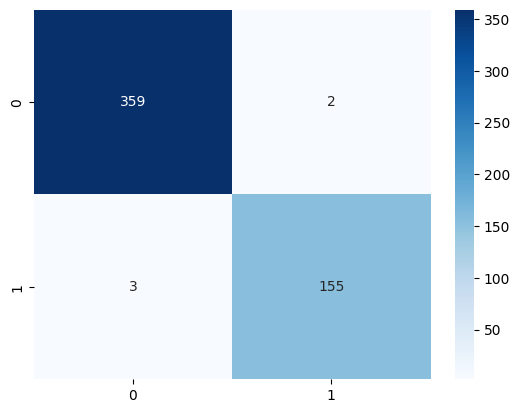

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

By considering some features

In [ ]:
X = cars[['buying_price','no_of_doors','no_of_persons']]
y = cars['decision']
feats = ['buying_price','no_of_doors','no_of_persons']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

encoder = OrdinalEncoder()
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

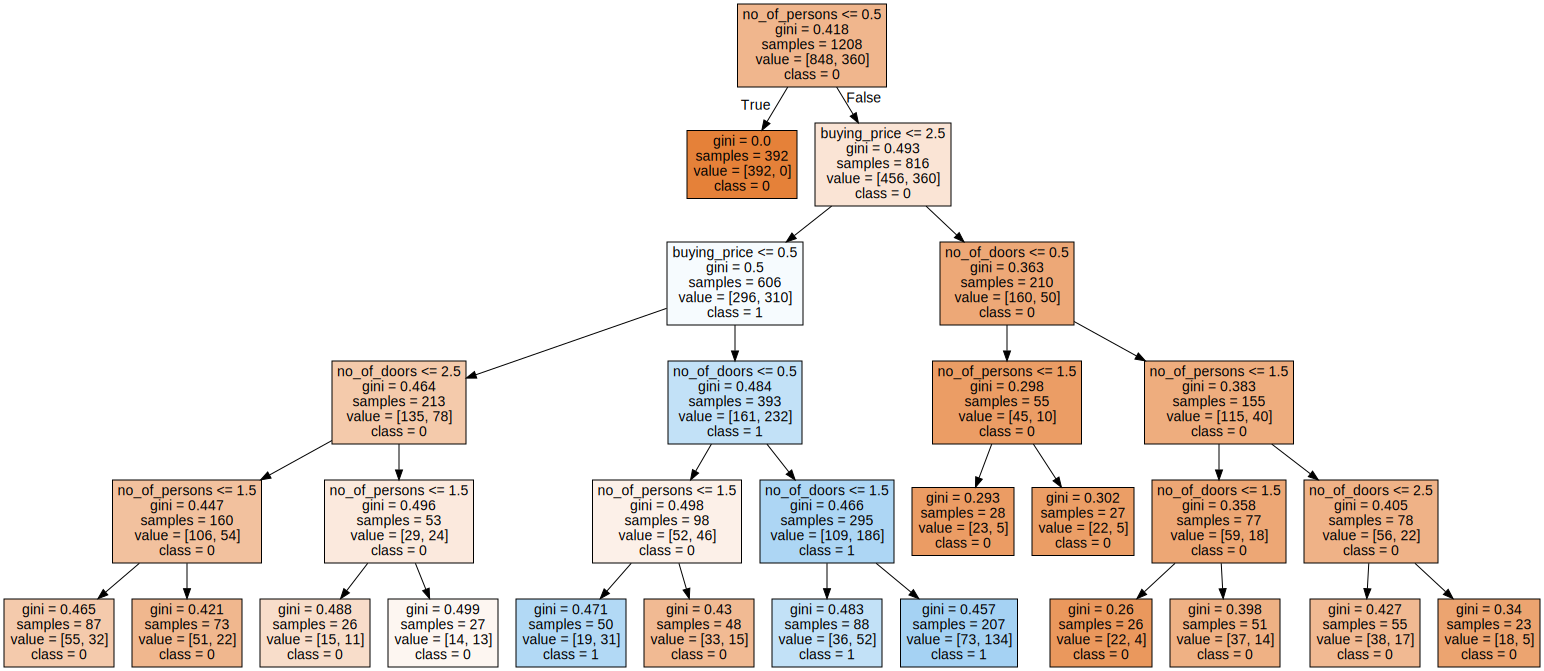

In [ ]:
treeclf1 = DecisionTreeClassifier(max_depth=5, random_state=42)
treeclf1.fit(X_train, y_train)
graph = Source(tree.export_graphviz(treeclf1, out_file=None,
                                    feature_names=feats,
                                    class_names=['0', '1'], filled = True))
svg = SVG(graph.pipe(format='svg'))
display(svg)


In [ ]:
y_pred_train = treeclf1.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)

y_pred_test = treeclf1.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

print('Training Accuracy:', train_accuracy)
print('Testing Accuracy:', test_accuracy)

Training Accuracy: 0.7756622516556292
Testing Accuracy: 0.74373795761079


In [ ]:
p,r,f,s = precision_recall_fscore_support(y_test, y_pred_test)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'precision = [0.81666667 0.57861635]'

'recall = [0.81440443 0.58227848]'

'f-score = [0.81553398 0.58044164]'

Considering only important features

In [ ]:
X = cars[['buying_price', 'no_of_persons', 'safety']]
y = cars['decision']
imp = ['buying_price', 'no_of_persons', 'safety']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

encoder = OrdinalEncoder()
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

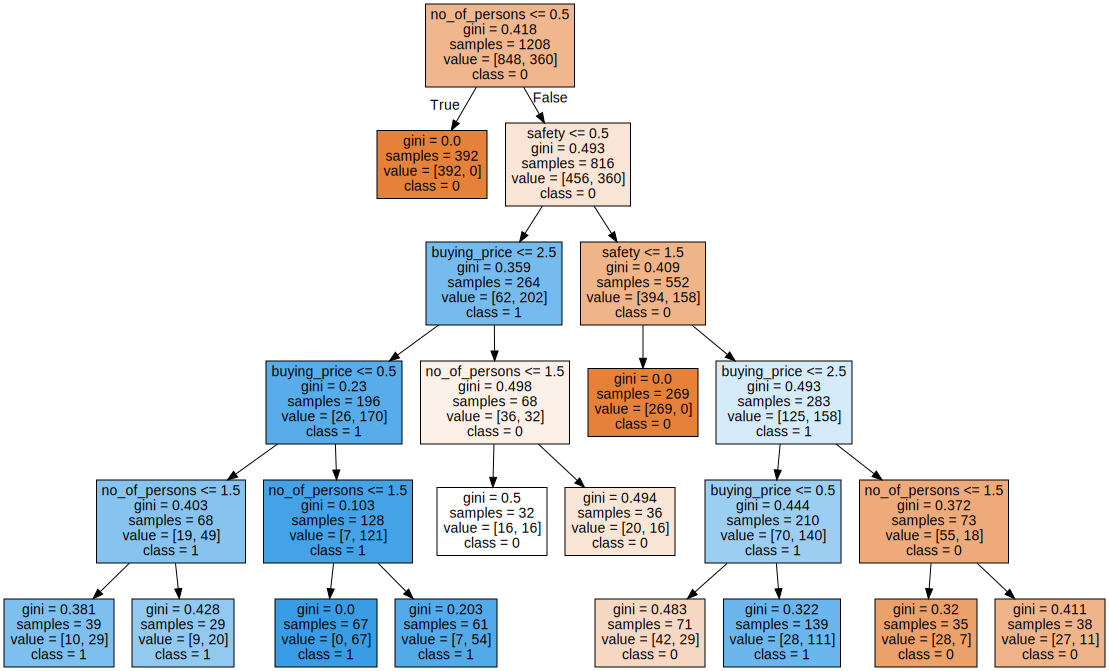

In [ ]:
treeclf2 = DecisionTreeClassifier(max_depth=5, random_state=42)
treeclf2.fit(X_train, y_train)
graph = Source(tree.export_graphviz(treeclf2, out_file=None,
                                    feature_names=imp,
                                    class_names=['0', '1'], filled = True))
svg = SVG(graph.pipe(format='svg'))
display(svg)


In [ ]:
y_pred_train = treeclf2.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)

y_pred_test = treeclf2.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

print('Training Accuracy:', train_accuracy)
print('Testing Accuracy:', test_accuracy)

Training Accuracy: 0.8899006622516556
Testing Accuracy: 0.9017341040462428


In [ ]:
p,r,f,s = precision_recall_fscore_support(y_test, y_pred_test)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'precision = [0.9144385  0.86896552]'

'recall = [0.94736842 0.79746835]'

'f-score = [0.93061224 0.83168317]'

#Neural Network

In [13]:
new = cars.copy()

In [14]:
X = new.drop('decision', axis=1)
y = new['decision']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [15]:
encoder = OrdinalEncoder()
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[ 0.44515473,  0.44617693,  1.33949248, -0.01526986, -1.22225123,
        -1.24474517],
       [-1.33546418, -1.3474395 , -0.43767053,  1.21446279,  1.21418357,
         1.216224  ],
       [-0.44515473,  0.44617693, -0.43767053, -0.01526986, -0.00403383,
         1.216224  ],
       ...,
       [-1.33546418, -0.45063128,  1.33949248,  1.21446279, -1.22225123,
        -0.01426058],
       [-0.44515473, -1.3474395 ,  0.45091098, -1.24500251,  1.21418357,
        -1.24474517],
       [ 0.44515473,  0.44617693, -0.43767053,  1.21446279,  1.21418357,
        -1.24474517]])

#With two hidden layers

In [22]:
mlp1 = MLPClassifier(hidden_layer_sizes=(12,16),max_iter=2000)

In [23]:
mlp1.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(12, 16), max_iter=2000)

In [24]:
predictions = mlp1.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       361
           1       0.99      0.97      0.98       158

    accuracy                           0.99       519
   macro avg       0.99      0.98      0.98       519
weighted avg       0.99      0.99      0.99       519



In [21]:
print(confusion_matrix(y_test,predictions))

[[361   0]
 [  4 154]]


In [26]:
def about(mlp):
  print('This dataset has {} input nodes and {} output node(s)'.format(len(X.columns), len(y.unique())))
  print('There are {} 2D arrays of coefficients, one for each layer'.format(len(mlp.coefs_)))
  print('The layers have the following number of coefficients: {}')
  for l in range(len(mlp.coefs_)):
      m = len(mlp.coefs_[l])
      n = len(mlp.coefs_[l][0])
      print('  {}: {}x{} ({} nodes feeding into a layer of {} nodes)'.format(l, m, n, m, n))
  # Print the actual coefficients
  # print(mlp.coefs_)

  print()
  print('There are {} 1D arrays of intercepts, one for each layer'.format(len(mlp.intercepts_)))
  print('Each layer has {} intercepts, one for each node'.format([len(mlp.intercepts_[l]) for l,_ in enumerate(mlp.intercepts_)]))


In [28]:
about(mlp1)

This dataset has 6 input nodes and 2 output node(s)
There are 3 2D arrays of coefficients, one for each layer
The layers have the following number of coefficients: {}
  0: 6x12 (6 nodes feeding into a layer of 12 nodes)
  1: 12x16 (12 nodes feeding into a layer of 16 nodes)
  2: 16x1 (16 nodes feeding into a layer of 1 nodes)

There are 3 1D arrays of intercepts, one for each layer
Each layer has [12, 16, 1] intercepts, one for each node


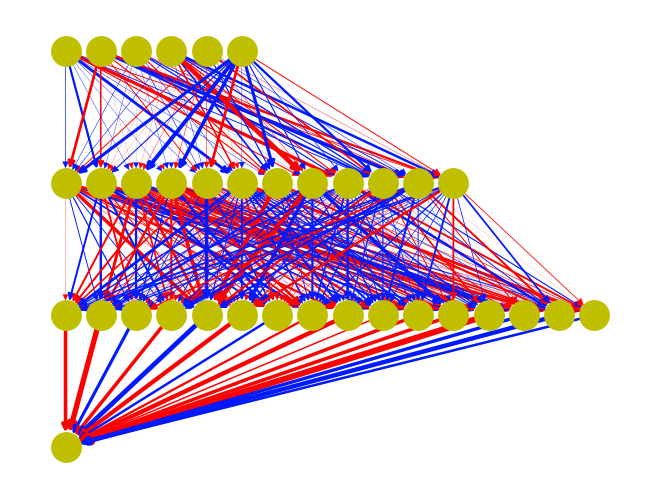

In [29]:
# you may need to install networkx with pip
import networkx as nx
import colorsys

def show_ann(mlp):
    hidden_layers_n = len(mlp.coefs_)-1
    layers_n = hidden_layers_n + 2
    input_neurons_n = len(mlp.coefs_[0])
    hidden_neurons_n = [len(mlp.coefs_[i+1]) for i in range(hidden_layers_n)]
    output_neurons_n = len(mlp.coefs_[-1][0])

    G = nx.DiGraph()
    pos = {}

    # Create the neurons of the input layer
    for i in range(input_neurons_n):
        pos['Layer0_{}'.format(i)] = (i,layers_n-1)

    for j in range(hidden_layers_n):
        # Create the neurons of the j'th hidden layer
        prev_layer = j
        cur_layer = j+1
        if (j == 0):
            prev_size = input_neurons_n
        else:
            prev_size = hidden_neurons_n[j-1]
        for i in range(hidden_neurons_n[j]):
            pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
            for k in range(prev_size):
                w = mlp.coefs_[prev_layer][k][i]
                G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    # Create the neurons of the output layer
    prev_layer = hidden_layers_n
    cur_layer = hidden_layers_n+1
    for i in range(output_neurons_n):
        pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
        for k in range(hidden_neurons_n[-1]):
            w = mlp.coefs_[prev_layer][k][i]
            G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    edges = G.edges()
    colors = [colorsys.hsv_to_rgb(0 if G[u][v]['weight'] < 0 else 0.65,
                                  1,#min(1, abs(G[u][v]['weight'])),
                                  1) for u,v in edges]
    weights = [abs(G[u][v]['weight'])*2 for u,v in edges]

    nx.draw(G, pos, node_color='y', node_size=450, width=weights, edge_color=colors)
    
show_ann(mlp1)

#With 1 hidden layer

In [52]:
mlp = MLPClassifier(hidden_layer_sizes=(32),activation='tanh',solver='sgd',max_iter=1500)
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[315  46]
 [ 90  68]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       361
           1       0.60      0.43      0.50       158

    accuracy                           0.74       519
   macro avg       0.69      0.65      0.66       519
weighted avg       0.72      0.74      0.72       519



Using relu activation may have contributed better performance 

In [51]:
mlp = MLPClassifier(hidden_layer_sizes=(32),activation='relu',solver='sgd',max_iter=1500)
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[345  16]
 [  9 149]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       361
           1       0.90      0.94      0.92       158

    accuracy                           0.95       519
   macro avg       0.94      0.95      0.94       519
weighted avg       0.95      0.95      0.95       519



In [49]:
about(mlp)

This dataset has 6 input nodes and 2 output node(s)
There are 2 2D arrays of coefficients, one for each layer
The layers have the following number of coefficients: {}
  0: 6x32 (6 nodes feeding into a layer of 32 nodes)
  1: 32x1 (32 nodes feeding into a layer of 1 nodes)

There are 2 1D arrays of intercepts, one for each layer
Each layer has [32, 1] intercepts, one for each node


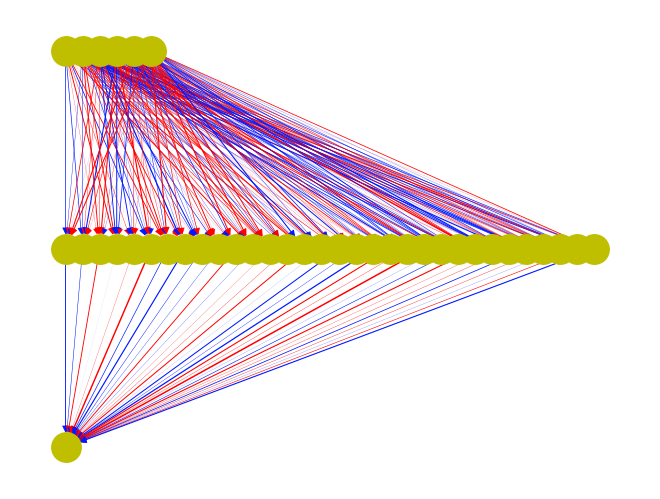

In [50]:
show_ann(mlp)

# With 3 hidden layers

In [30]:
mlp2 = MLPClassifier(hidden_layer_sizes=(15,25,50),activation='relu',solver='adam',max_iter=1000)
mlp2.fit(X_train,y_train)
predictions = mlp2.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[358   3]
 [  5 153]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       361
           1       0.98      0.97      0.97       158

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



In [31]:
about(mlp2)

This dataset has 6 input nodes and 2 output node(s)
There are 4 2D arrays of coefficients, one for each layer
The layers have the following number of coefficients: {}
  0: 6x15 (6 nodes feeding into a layer of 15 nodes)
  1: 15x25 (15 nodes feeding into a layer of 25 nodes)
  2: 25x50 (25 nodes feeding into a layer of 50 nodes)
  3: 50x1 (50 nodes feeding into a layer of 1 nodes)

There are 4 1D arrays of intercepts, one for each layer
Each layer has [15, 25, 50, 1] intercepts, one for each node


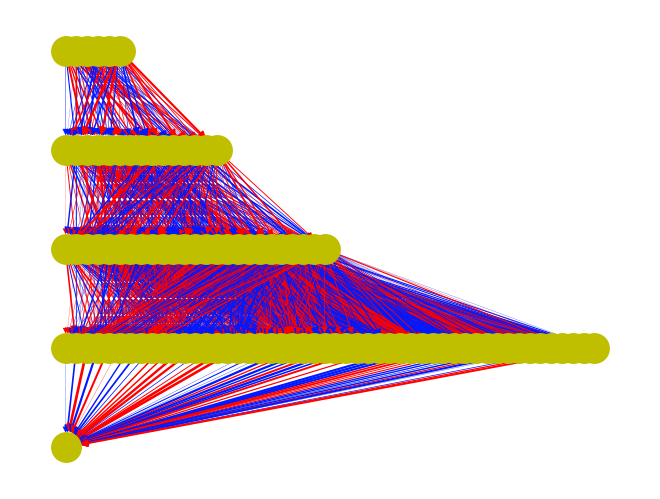

In [32]:
show_ann(mlp2)

#With 6 hidden layers

In [35]:
mlp3 = MLPClassifier(hidden_layer_sizes=(64, 32, 16, 8, 4, 2),activation='relu',solver='adam',max_iter=1000)
mlp3.fit(X_train,y_train)
predictions = mlp3.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[359   2]
 [104  54]]
              precision    recall  f1-score   support

           0       0.78      0.99      0.87       361
           1       0.96      0.34      0.50       158

    accuracy                           0.80       519
   macro avg       0.87      0.67      0.69       519
weighted avg       0.83      0.80      0.76       519



In [36]:
y_pred_train = mlp3.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)

y_pred_test = mlp3.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

print('Training Accuracy:', train_accuracy)
print('Testing Accuracy:', test_accuracy)

Training Accuracy: 0.8253311258278145
Testing Accuracy: 0.7957610789980732


In [38]:
about(mlp3)

This dataset has 6 input nodes and 2 output node(s)
There are 7 2D arrays of coefficients, one for each layer
The layers have the following number of coefficients: {}
  0: 6x64 (6 nodes feeding into a layer of 64 nodes)
  1: 64x32 (64 nodes feeding into a layer of 32 nodes)
  2: 32x16 (32 nodes feeding into a layer of 16 nodes)
  3: 16x8 (16 nodes feeding into a layer of 8 nodes)
  4: 8x4 (8 nodes feeding into a layer of 4 nodes)
  5: 4x2 (4 nodes feeding into a layer of 2 nodes)
  6: 2x1 (2 nodes feeding into a layer of 1 nodes)

There are 7 1D arrays of intercepts, one for each layer
Each layer has [64, 32, 16, 8, 4, 2, 1] intercepts, one for each node


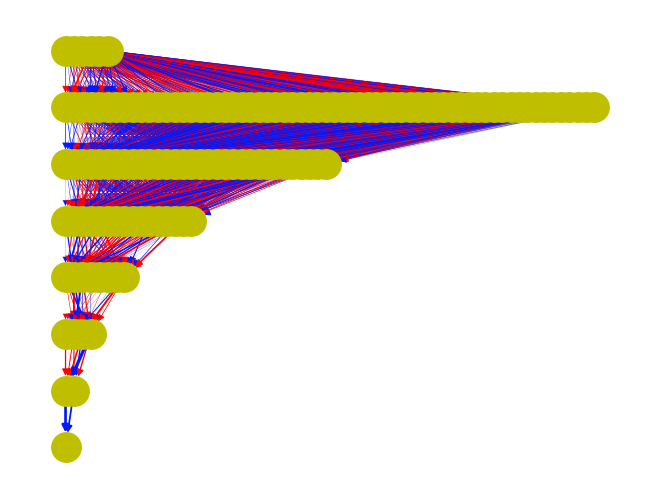

In [37]:
show_ann(mlp3)